In [4]:
!pip install scikit-image


Dieser Code führt mehrere Schritte aus, um Maskenbilder aus PNG-Dateien zu laden, diese zu binarisieren und die maskierten Bereiche zu kategorisieren. Hier ist eine detaillierte Beschreibung dessen, was der Code macht:

In [1]:
import os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

Eine PNG-Maske wird aus dem Dateipfad labels_as_png/task-1-annotation-2-by-1-tag-Dächer-0.png geladen.

Das geladene Bild wird im Graustufen-Farbmodus (cmap='gray') angezeigt.

Alle eindeutigen Werte der Maske werden ausgegeben, um zu überprüfen, ob das Bild wirklich binär ist.

In [ ]:
#Loading a png mask image for inspection
test_mask_png = io.imread("C:\\Users\\bilge\\OneDrive\\Masaüstü\\ML Wärmelyse\\waermelyse\\machine_learning\\wms_output\\Bericht Masken\\"
plt.imshow(test_mask_png, cmap='gray')
print(np.unique(test_mask_png))  #This is not a true binary image.

#Let us load a numpy array saved from Label Studio
#test_mask_np = np.load("labels_as_numpy/task-1-annotation-2-by-1-tag-Dächer-0.npy")
#plt.imshow(test_mask_np, cmap='gray')
#print(np.unique(test_mask_np)) #This is not a true binary image.

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4108140744.py, line 2)

## Binarisierung der PNG-Maske:

Alle Pixelwerte der PNG-Maske, die größer als 0 sind, werden auf 1 gesetzt, wodurch die Maske binär wird (alle Nicht-Null-Werte werden zu 1).

Die eindeutigen Werte der binarisierten Maske werden ausgegeben und das binarisierte Bild wird angezeigt.

[0 1]


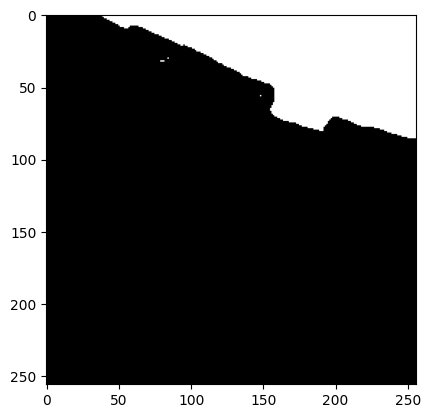

In [4]:
#Need to binarize the image. Simple thresholding for values above 0. 
#Convert all values above 0 to 1 to assign a pixel value of 1 for the Houses class.
#Similarly convert other values for other classes to 2, 3, etc. 
my_mask = np.where(test_mask_png>0, 1, test_mask_png)
print(np.unique(my_mask))
plt.imshow(my_mask, cmap='gray')

## Alle geleabelten Bilder laden

Masken aus einem Verzeichnis laden und kategorisieren.

In [5]:
label_folder = "labels_as_png/"
dach_masks = []
baum_masks = []

all_masks=[]

for filename in os.listdir(label_folder):
    #print(filename)
    if "Dächer" in filename:
        print(filename)
        dach_mask = io.imread(label_folder + filename)
        dach_mask = np.where(dach_mask>0, 1, dach_mask)
        dach_masks.append(dach_mask)
    elif "Bäume" in filename:
        print(filename)
        baum_mask = io.imread(label_folder + filename)
        baum_mask = np.where(baum_mask>0, 2, baum_mask)
        baum_masks.append(baum_mask)

task-1-annotation-2-by-1-tag-Bäume-0.png
task-1-annotation-2-by-1-tag-Dächer-0.png
task-10-annotation-14-by-1-tag-Bäume-0.png
task-10-annotation-14-by-1-tag-Dächer-0.png
task-11-annotation-15-by-1-tag-Bäume-0.png
task-11-annotation-15-by-1-tag-Dächer-0.png
task-12-annotation-16-by-1-tag-Bäume-0.png
task-13-annotation-17-by-1-tag-Bäume-0.png
task-14-annotation-18-by-1-tag-Bäume-0.png
task-15-annotation-19-by-1-tag-Bäume-0.png
task-2-annotation-3-by-1-tag-Bäume-0.png
task-2-annotation-3-by-1-tag-Dächer-0.png
task-3-annotation-4-by-1-tag-Bäume-0.png
task-3-annotation-4-by-1-tag-Dächer-0.png
task-4-annotation-5-by-1-tag-Bäume-0.png
task-4-annotation-5-by-1-tag-Dächer-0.png
task-5-annotation-6-by-1-tag-Bäume-0.png
task-5-annotation-6-by-1-tag-Dächer-0.png
task-6-annotation-7-by-1-tag-Bäume-0.png
task-6-annotation-7-by-1-tag-Dächer-0.png
task-63-annotation-20-by-1-tag-Bäume-0.png
task-63-annotation-20-by-1-tag-Dächer-0.png
task-64-annotation-22-by-1-tag-Bäume-0.png
task-64-annotation-22-by-1

## Bilder umbenennen


In [1]:
import os

def umbenennen_bilder(verzeichnis):
    # Holen Sie sich alle PNG-Dateien im Verzeichnis
    dateien = [f for f in os.listdir(verzeichnis) if f.endswith('.png') and os.path.isfile(os.path.join(verzeichnis, f))]
    
    # Sortieren Sie die Dateien nach Name (oder nach anderen Kriterien)
    dateien.sort()

    # Umbenennen der Dateien in der Reihenfolge
    for i, datei in enumerate(dateien, start=1):
        alte_datei = os.path.join(verzeichnis, datei)
        neue_datei = os.path.join(verzeichnis, f"task-{i}.png")  # task-1.png, task-2.png, ...
        
        # Umbenennen
        os.rename(alte_datei, neue_datei)
        print(f"Umbenannt: {alte_datei} -> {neue_datei}")

# Beispielaufruf
verzeichnis = 'C:\\Users\\bilge\\OneDrive\\Masaüstü\\ML Wärmelyse\\waermelyse\\machine_learning\\wms_output\\Test'
umbenennen_bilder(verzeichnis)


Umbenannt: C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\tile_488608_5881989_png.png -> C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\task-1.png
Umbenannt: C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\tile_488608_5882015_png.png -> C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\task-2.png
Umbenannt: C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\tile_488608_5882041_png.png -> C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\task-3.png
Umbenannt: C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\tile_488608_5882067_png.png -> C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Test\task-4.png
Umbenannt: C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\

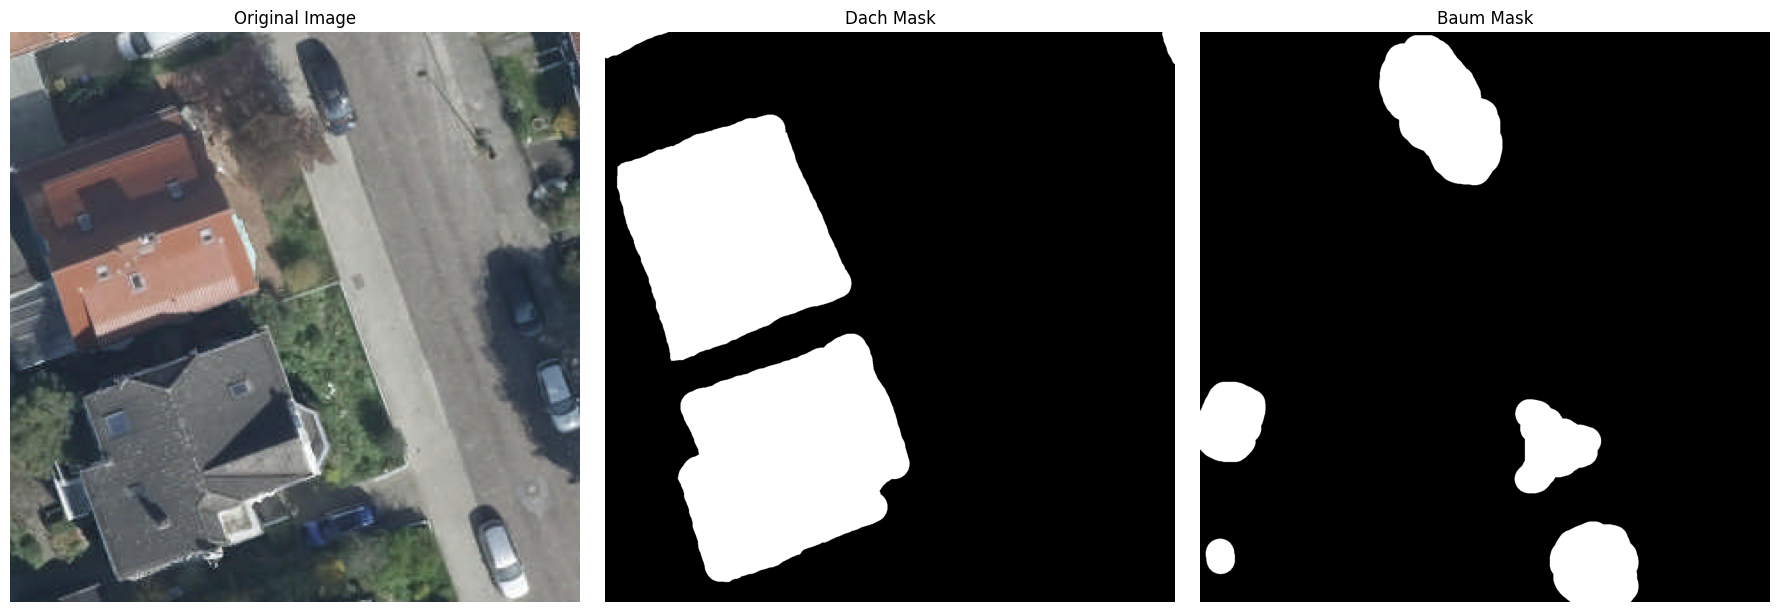

In [6]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

# Laden der Original- und Maskenbilder
original_image_path = r"C:\Users\bilge\Downloads\Bericht Bild 1.jpeg"
baum_mask_path = r"C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Bericht Masken\task-76-annotation-26-by-1-tag-Bäume-0.png"
dach_mask_path = r"C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Bericht Masken\task-76-annotation-26-by-1-tag-Dächer-0.png"

original_image = io.imread(original_image_path)
dach_mask = io.imread(dach_mask_path)
baum_mask = io.imread(baum_mask_path)

# Binarisierung der Masken
dach_mask = np.where(dach_mask > 0, 1, 0)
baum_mask = np.where(baum_mask > 0, 1, 0)

# Erstellen der Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Anzeigen des Originalbilds
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Achsen ausblenden

# Anzeigen der Dach-Maske
axes[1].imshow(dach_mask, cmap='gray')
axes[1].set_title("Dach Mask")
axes[1].axis('off')  # Achsen ausblenden

# Anzeigen der Baum-Maske
axes[2].imshow(baum_mask, cmap='gray')
axes[2].set_title("Baum Mask")
axes[2].axis('off')  # Achsen ausblenden

# Anzeigen der Bilder
plt.tight_layout()
plt.show()



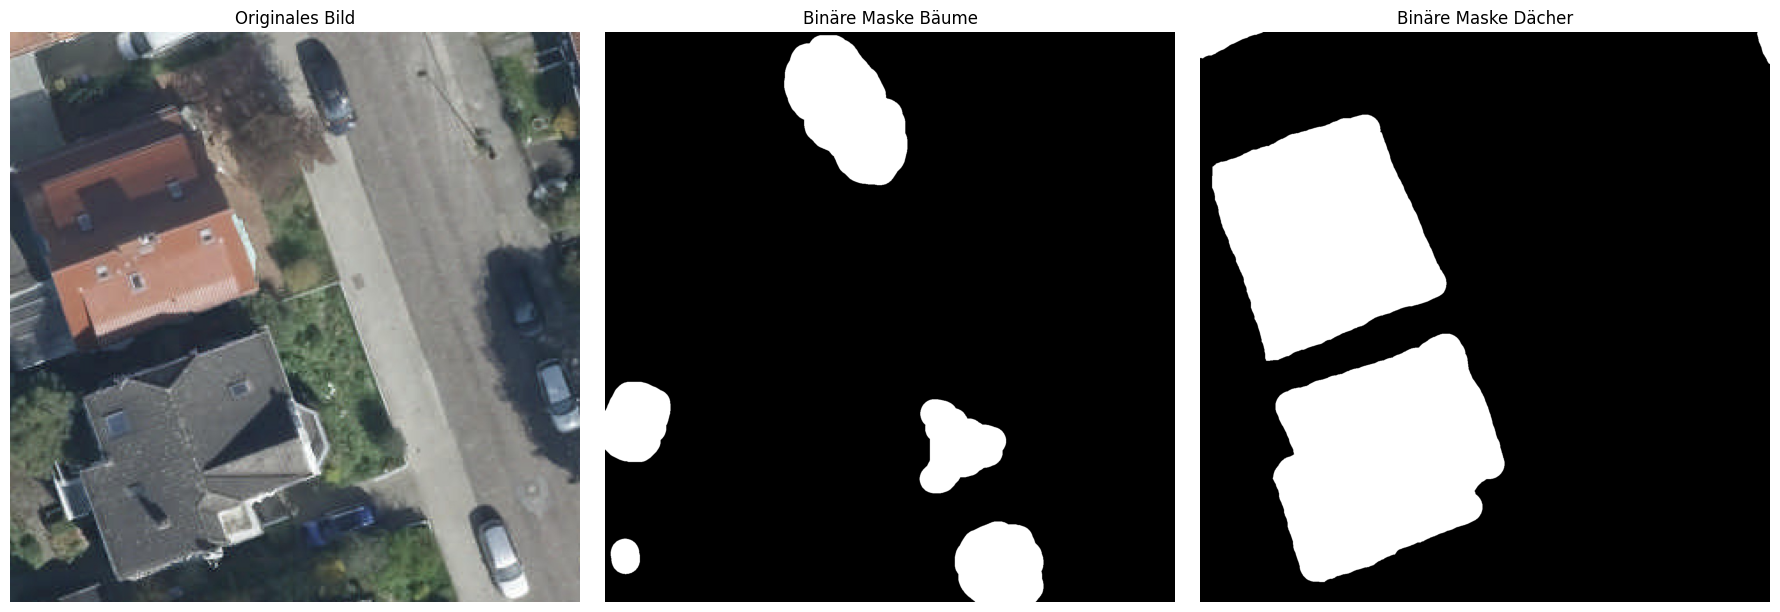

In [14]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import matplotlib.patches as patches

# Laden der Original- und Maskenbilder
original_image_path =r"C:\Users\bilge\Downloads\Bericht Bild 1.jpeg"
dach_mask_path = r"C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Bericht Masken\task-76-annotation-26-by-1-tag-Dächer-0.png"
baum_mask_path =  r"C:\Users\bilge\OneDrive\Masaüstü\ML Wärmelyse\waermelyse\machine_learning\wms_output\Bericht Masken\task-76-annotation-26-by-1-tag-Bäume-0.png"

original_image = io.imread(original_image_path)
dach_mask = io.imread(dach_mask_path)
baum_mask = io.imread(baum_mask_path)

# Binarisierung der Masken
dach_mask = np.where(dach_mask > 0, 1, 0)
baum_mask = np.where(baum_mask > 0, 1, 0)

# Erstellen der Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Definieren der Farbe für den Rahmen (schwarz)
frame_color = 'black'

# Hinzufügen des Rahmens und Anzeigen des Originalbilds
axes[0].imshow(original_image)
axes[0].set_title("Originales Bild")
axes[0].axis('off')  # Achsen ausblenden
#axes[0].add_patch(patches.Rectangle((0, 0), original_image.shape[1], original_image.shape[0], linewidth=5, edgecolor=frame_color, facecolor='none'))

# Hinzufügen des Rahmens und Anzeigen der Baum-Maske
axes[1].imshow(baum_mask, cmap='gray')
axes[1].set_title("Binäre Maske Bäume")
axes[1].axis('off')  # Achsen ausblenden
#axes[1].add_patch(patches.Rectangle((0, 0), baum_mask.shape[1], baum_mask.shape[0], linewidth=5, edgecolor=frame_color, facecolor='none'))

# Hinzufügen des Rahmens und Anzeigen der Dach-Maske
axes[2].imshow(dach_mask, cmap='gray')
axes[2].set_title("Binäre Maske Dächer")
axes[2].axis('off')  # Achsen ausblenden
#axes[2].add_patch(patches.Rectangle((0, 0), dach_mask.shape[1], dach_mask.shape[0], linewidth=5, edgecolor=frame_color, facecolor='none'))

# Anzeigen der Bilder
plt.tight_layout()
plt.show()




In [ ]:
#Loading a png mask image for inspection
test_mask_png = io.imread("C:\\Users\\bilge\\OneDrive\\Masaüstü\\ML Wärmelyse\\waermelyse\\machine_learning\\wms_output\\Bericht Masken\\"
plt.imshow(test_mask_png, cmap='gray')
print(np.unique(test_mask_png))  #This is not a true binary image.

#Let us load a numpy array saved from Label Studio
#test_mask_np = np.load("labels_as_numpy/task-1-annotation-2-by-1-tag-Dächer-0.npy")
#plt.imshow(test_mask_np, cmap='gray')
#print(np.unique(test_mask_np)) #This is not a true binary image.

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4108140744.py, line 2)